<a href="https://colab.research.google.com/github/bhertzberg/StarShotSims/blob/main/Radioactive_Decay_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def microDC(lam, totalTime, numDetectors):      #lamdba emissions per second per detector, totalTime of simulation in seconds, total number of detectors

  #each detector's dark counts follow a poisson distribution with lambda = lam. These iid random variables add together to form a poisson variable with lambda = numDetectors*lam
  #the times between each dark count arrival can then be modeled with an exponential distribution with rate 1/(numDetectors*lam)

  arrive = np.random.exponential(1/(lam*numDetectors)) #first arrival time of a DC, following a radioactive emmission rate of lambda counts per second
  microSec = arrive * 1000000 - 1   #convert arrive time to milliseconds, subtract 1 to allow spot for DC
  microSec = np.trunc(microSec) 
  dc = [['counts', 'DC Val']]
  dc.append([microSec, 0])      # microSec is time in microseconds since last DC
  dc.append([microSec+1, 1])    # 0 for no DC, 1 for DC
  timePassed = arrive
  while timePassed<totalTime:          #generate DC for 10 seconds
    arrive = np.random.exponential(1/(lam*numDetectors))   #generate time until next DC
    microSec = arrive * 1000000 - 1
    microSec = np.trunc(microSec)
    timePassed += arrive
    if timePassed < totalTime:
      dc.append([microSec, 0])      #add new DC to the array
      dc.append([microSec+1, 1])
  return dc

In [20]:
dc = microDC(2,10, 10000) #simulate 10,000 detectors each with DCR 2 per second over 10 seconds. 

In [21]:
dc

[['counts', 'DC Val'],
 [82.0, 0],
 [83.0, 1],
 [117.0, 0],
 [118.0, 1],
 [115.0, 0],
 [116.0, 1],
 [75.0, 0],
 [76.0, 1],
 [138.0, 0],
 [139.0, 1],
 [9.0, 0],
 [10.0, 1],
 [177.0, 0],
 [178.0, 1],
 [20.0, 0],
 [21.0, 1],
 [39.0, 0],
 [40.0, 1],
 [11.0, 0],
 [12.0, 1],
 [14.0, 0],
 [15.0, 1],
 [100.0, 0],
 [101.0, 1],
 [14.0, 0],
 [15.0, 1],
 [5.0, 0],
 [6.0, 1],
 [48.0, 0],
 [49.0, 1],
 [50.0, 0],
 [51.0, 1],
 [7.0, 0],
 [8.0, 1],
 [171.0, 0],
 [172.0, 1],
 [84.0, 0],
 [85.0, 1],
 [40.0, 0],
 [41.0, 1],
 [6.0, 0],
 [7.0, 1],
 [43.0, 0],
 [44.0, 1],
 [19.0, 0],
 [20.0, 1],
 [76.0, 0],
 [77.0, 1],
 [7.0, 0],
 [8.0, 1],
 [11.0, 0],
 [12.0, 1],
 [97.0, 0],
 [98.0, 1],
 [90.0, 0],
 [91.0, 1],
 [70.0, 0],
 [71.0, 1],
 [38.0, 0],
 [39.0, 1],
 [10.0, 0],
 [11.0, 1],
 [8.0, 0],
 [9.0, 1],
 [14.0, 0],
 [15.0, 1],
 [33.0, 0],
 [34.0, 1],
 [70.0, 0],
 [71.0, 1],
 [55.0, 0],
 [56.0, 1],
 [29.0, 0],
 [30.0, 1],
 [129.0, 0],
 [130.0, 1],
 [20.0, 0],
 [21.0, 1],
 [14.0, 0],
 [15.0, 1],
 [86.0, 0],
 [

In [22]:
def decodeDCList(dcList):
  decodeDC = []
  for i in range(1,len(dcList), 2):
    for j in range(int(dcList[i][0])):  #read in the counts for the 0 DC val rows
      decodeDC.append(0)                #add that number of 0s, followed by a single 1 (representing 1 DC)
    decodeDC.append(1)
  while len(decodeDC)<10000000:         #add 0s until 10 sec is reached
    decodeDC.append(0)
  return decodeDC

In [23]:
decodedDC = decodeDCList(dc)

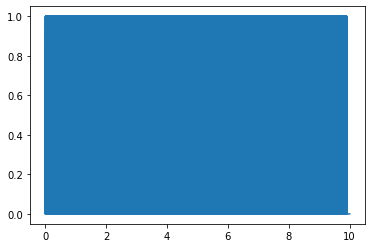

In [24]:
x3=np.linspace(0, len(decodedDC)/1000000, len(decodedDC))   #divide length by million to convert to seconds
plt.plot(x3, decodedDC)

In [12]:
np.random.gamma(3, 1/2)

1.9810547452275584